In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [0]:
mean = [0.49159187, 0.48234594, 0.44671956]
std = [0.23834434, 0.23486559, 0.25264624]

In [0]:
train_transform = transforms.Compose([
  transforms.Resize(128),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
  transforms.Resize(128),
  transforms.ToTensor(),
  transforms.Normalize(mean, std)
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='drive/My Drive/Colab Notebooks/data/cifar10/train',
                                        train=True,
                                        download=True,
                                        transform=train_transform)

testset = torchvision.datasets.CIFAR10(root='drive/My Drive/Colab Notebooks/data/cifar10/test', 
                                       train=False, 
                                       download=True, 
                                       transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=2)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=16,
                                         shuffle=False,
                                         num_workers=2)

In [6]:
class_names = trainset.classes
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [0]:
in_size = 3

hid1_size = 16
hid2_size = 32
hid3_size = 64

out1_size = 2000
out2_size = 10

k_conv_size = 9

In [0]:
class ConvNet(nn.Module):

  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(hid2_size, hid3_size, k_conv_size),
        nn.BatchNorm2d(hid3_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer4 = nn.Sequential(
        nn.Linear(hid3_size * k_conv_size * k_conv_size, out1_size),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(out1_size, out2_size))
  
  def forward(self, x):
    
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)

    out = out.reshape(out.size(0), -1)
    
    out = self.layer4(out)

    return F.log_softmax(out, -1)

In [0]:
model = ConvNet()

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [11]:
model.to(device)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(9, 9), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(9, 9), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=5184, out_features=2000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_fe

In [0]:
learning_rate = 0.0001
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
total_step = len(trainloader)
num_epochs = 10
loss_values = []

In [26]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):

    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch: {}/{}, Step: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
      loss_values.append(loss.item())

print('Finished training')

Epoch: 1/10, Step: 2000/3125, Loss: 0.7253
Epoch: 2/10, Step: 2000/3125, Loss: 0.8302
Epoch: 3/10, Step: 2000/3125, Loss: 0.5339
Epoch: 4/10, Step: 2000/3125, Loss: 0.7376
Epoch: 5/10, Step: 2000/3125, Loss: 0.9235
Epoch: 6/10, Step: 2000/3125, Loss: 0.4028
Epoch: 7/10, Step: 2000/3125, Loss: 0.3498
Epoch: 8/10, Step: 2000/3125, Loss: 0.3617
Epoch: 9/10, Step: 2000/3125, Loss: 1.1022
Epoch: 10/10, Step: 2000/3125, Loss: 0.7404
Finished training


Text(0, 0.5, 'Loss')

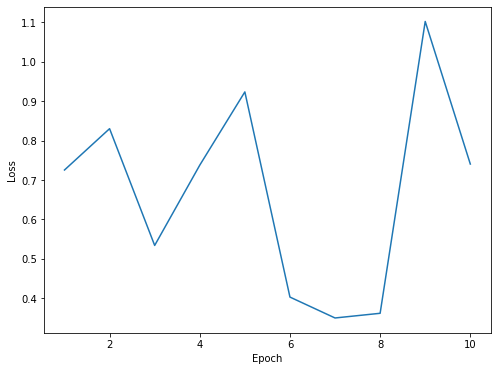

In [27]:
x = range(1, 11)

plt.figure(figsize=(8, 6))
plt.plot(x, loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [28]:
model.eval()

with torch.no_grad():
  
  total = 0
  correct = 0
  
  for images, labels in testloader:
    
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Accuracy of the model: {}%'.format(100 * correct / total))

Accuracy of the model: 70.5%
